# 按需求和规矩处理数据

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from scipy.stats import normaltest, ttest_ind, mannwhitneyu

import warnings
warnings.filterwarnings('ignore')


plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

In [11]:
df = pd.read_excel("赛题附件\\附件1.xlsx")
df1 = df[['镇静药名称','性别','年龄','身高','体重','有无手术史','有无既往史','是否吸烟',
    '是否酗酒','有无PONV','有无晕动史',
    'sbp00', 'dbp00', 'petco200', 'RR00', 
    'spo200', 'HR00', 'IPI00', 'moaas00',
    'sbp005','dbp005','petco2005','RR005','spo2005','HR005','IPI005','moaas005','sbp1','dbp1',
    'petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing','dbpjinjing','petco2jinjing',
    'RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing','sbp015','dbp015','petco2015',
    'RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2','petco22','RR2','spo22',
    'HR2','IPI2','moaas2','sbp025','dbp025','petco2025','RR025','spo2025','HR025','IPI025',
    'moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3','moaas3','sbp5',
    'dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbp10','dbp10','petco210','RR10','spo210',
    'HR10','IPI10','moaas10','sbp15','dbp15','petco215','RR15','spo215','HR15','IPI15',
    'moaas15','sbp20','dbp20','petco220','RR20','spo220','HR20','IPI20','moaas20','sbpjieshu',
    'dbpjieshu','petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu']]


In [12]:
df1["镇静药名称"] = df1["镇静药名称"].map({"B药": 1, "R药": 0})

# 这部分要抄到论文的三线表里
# (df1.isnull().sum() / len(df)).to_excel('探索信息\\缺失值情况.xlsx')

In [13]:
df2 = df1.drop(['sbp005','sbp015','sbp025','dbp005','dbp015','dbp025',
            'sbp10','dbp10','petco210','RR10','spo210','HR10','IPI10','moaas10','sbp15',
            'dbp15','petco215','RR15','spo215','HR15','IPI15','moaas15','sbp20','dbp20',		
            'petco220','RR20','spo220','HR20','IPI20','moaas20'], axis=1)
df2.shape


(1245, 92)

In [14]:
# 删掉有缺失值的行
df3 = df2.dropna()
df3.shape

(698, 92)

## 数据归一化

In [15]:
# 数据归一化
model = MinMaxScaler()
df3[['sbp00', 'dbp00', 'petco200', 'RR00', 'spo200', 'HR00', 'IPI00', 'moaas00',
    'petco2005','RR005','spo2005','HR005','IPI005','moaas005','sbp1','dbp1',
    'petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing','dbpjinjing','petco2jinjing',
    'RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing','petco2015',
    'RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2','petco22','RR2','spo22',
    'HR2','IPI2','moaas2','petco2025','RR025','spo2025','HR025','IPI025',
    'moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3','moaas3','sbp5',
    'dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu',
    'dbpjieshu','petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu']] = \
        model.fit_transform(df3[['sbp00', 'dbp00', 'petco200', 'RR00', 'spo200', 'HR00', 'IPI00', 'moaas00',
    'petco2005','RR005','spo2005','HR005','IPI005','moaas005','sbp1','dbp1',
    'petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing','dbpjinjing','petco2jinjing',
    'RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing','petco2015',
    'RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2','petco22','RR2','spo22',
    'HR2','IPI2','moaas2','petco2025','RR025','spo2025','HR025','IPI025',
    'moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3','moaas3','sbp5',
    'dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu',
    'dbpjieshu','petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu']])

## 删除相关性高的列

In [16]:
data = df3[['sbp00', 'dbp00', 'petco200', 'RR00', 'spo200', 'HR00', 'IPI00', 'moaas00',
    'petco2005','RR005','spo2005','HR005','IPI005','moaas005','sbp1','dbp1',
    'petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing','dbpjinjing','petco2jinjing',
    'RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing','petco2015',
    'RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2','petco22','RR2','spo22',
    'HR2','IPI2','moaas2','petco2025','RR025','spo2025','HR025','IPI025',
    'moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3','moaas3','sbp5',
    'dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu',
    'dbpjieshu','petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu']]

# 遍历每一列
for col1 in data.columns:
    for col2 in data.columns:
        # 如果列名相同或者已经被删除，跳过
        if col1 == col2 or col1 not in data.columns:
            continue
        # 计算两列的相关性
        correlation = data[col1].corr(data[col2])
        # 如果相关性大于0.7，删除后一列
        if correlation > 0.7:
            data.drop(col2, axis=1, inplace=True)

## 数据降维：主成分分析法

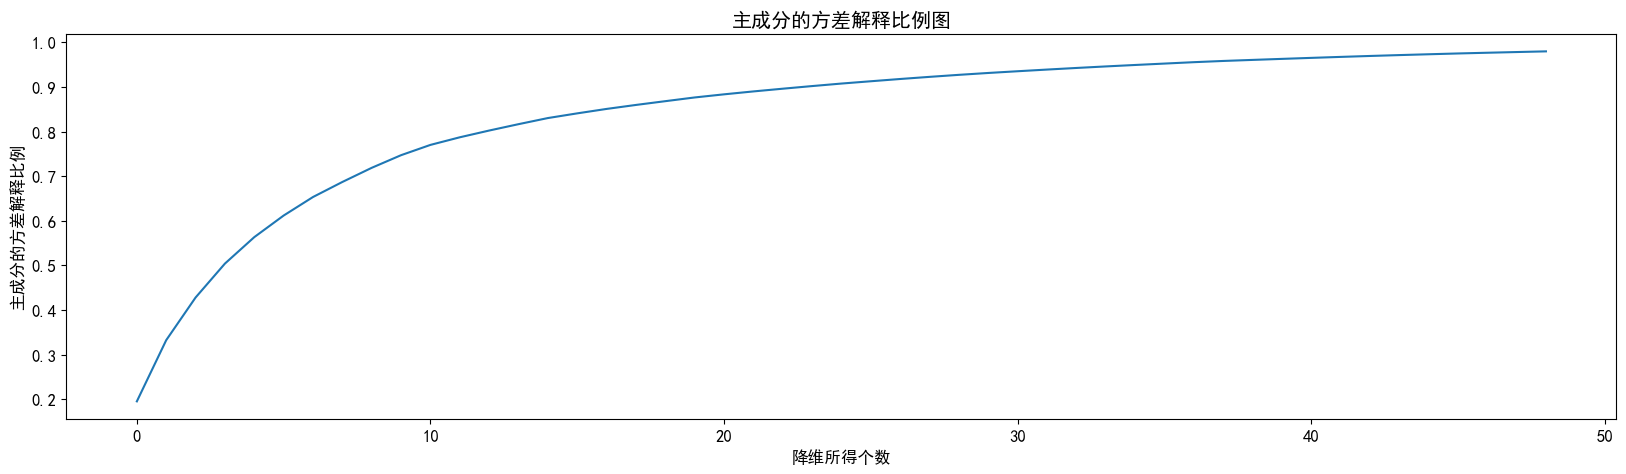

In [17]:
# 创建PCA对象并进行降维
pca = PCA(n_components=49)
df_try = pca.fit_transform(df3[['sbp00', 'dbp00', 'petco200', 'RR00', 'spo200', 'HR00', 'IPI00', 'moaas00',
    'petco2005','RR005','spo2005','HR005','IPI005','moaas005','sbp1','dbp1',
    'petco21','RR1','spo21','HR1','IPI1','moaas1','sbpjinjing','dbpjinjing','petco2jinjing',
    'RRjinjing','spo2jinjing','HRjinjing','IPIjinjing','moaasjinjing','petco2015',
    'RR015','spo2015','HR015','IPI015','moaas015','sbp2','dbp2','petco22','RR2','spo22',
    'HR2','IPI2','moaas2','petco2025','RR025','spo2025','HR025','IPI025',
    'moaas025','sbp3','dbp3','petco23','RR3','spo23','HR3','IPI3','moaas3','sbp5',
    'dbp5','petco25','RR5','spo25','HR5','IPI5','moaas5','sbp7','dbp7','petco27',
    'RR7','spo27','HR7','IPI7','moaas7','sbpjieshu',
    'dbpjieshu','petco2jieshu','RRjieshu','spo2jieshu','HRjieshu','IPIjieshu']])

# 绘制主成分方差解释比例图
plt.figure(figsize=(20, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('降维所得个数')
plt.ylabel('主成分的方差解释比例')
plt.title('主成分的方差解释比例图')
plt.show()

In [18]:
# 创建PCA对象并进行降维
pca = PCA(n_components=15)
df4 = pd.DataFrame(pca.fit_transform(df3.drop(['镇静药名称','性别','年龄','身高',
                                            '体重','有无手术史','有无既往史','是否吸烟',
                                            '是否酗酒','有无PONV','有无晕动史'], axis=1)))
df4.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

df4[['镇静药名称','性别','年龄','身高',
    '体重','有无手术史','有无既往史','是否吸烟',
    '是否酗酒','有无PONV','有无晕动史']] = df3[['镇静药名称','性别','年龄','身高',
                                            '体重','有无手术史','有无既往史','是否吸烟',
                                            '是否酗酒','有无PONV','有无晕动史']]
df5 = df4.dropna()


In [19]:
# df5.head()

In [20]:
df5.to_excel("探索信息\\用于第二题的表.xlsx")